## Download GESDISC Data

## Wget

NASA instructions - https://disc.gsfc.nasa.gov/data-access#opendap

wget --load-cookies C:\.urs_cookies --save-cookies C:\.urs_cookies --auth-no-challenge=on --keep-session-cookies --user=Mitchell_Odili --ask-password --content-disposition -i C:\Users\Ochibobo\Arset\subset_OCO2_L2_Lite_FP_10r_20220814_095923.txt --no-check-certificate

Where the txt file is the downloaded links of list in the same directory as .urc_cookies - https://stackoverflow.com/questions/48743736/how-to-download-data-from-ges-disc-using-wget-for-windows-10

# Reading the Individual files from ALL directories
## Libraries:
### OS
- OS walks over the directories and reads the files individually

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import netCDF4 as nc
import opendatasets as od

import os

In [2]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### EXAMPLE:
- READING the files from the following directory
- FOR 2021 datasets

### Level 2 Data

In [43]:
file_path_2021= []

for root, dirs, files in os.walk('C:/Users/Ochibobo/Arset/2021_data'):
    for filename in files:
        print(os.path.join(root, filename))
        
        # Append the files into list
        file_path_2021.append(os.path.join(root, filename))

C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210102_B10206Ar_210922005052s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210103_B10206Ar_210922005524s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210104_B10206Ar_210922005930s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210105_B10206Ar_210922010440s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210106_B10206Ar_210922011147s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210107_B10206Ar_210922011944s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210108_B10206Ar_210922012632s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210109_B10206Ar_210922013418s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210110_B10206Ar_210922014053s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210111_B10206Ar_210922014946s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210112_B10206Ar_210922015621s.SUB.nc4
C:/Users/Ochibobo/Arset/2021_data\oco2_LtCO2_210113_B10206Ar_210922020458s.SUB.nc4
C:/U

In [44]:
file_path_2021

['C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210102_B10206Ar_210922005052s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210103_B10206Ar_210922005524s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210104_B10206Ar_210922005930s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210105_B10206Ar_210922010440s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210106_B10206Ar_210922011147s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210107_B10206Ar_210922011944s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210108_B10206Ar_210922012632s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210109_B10206Ar_210922013418s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210110_B10206Ar_210922014053s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210111_B10206Ar_210922014946s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_data\\oco2_LtCO2_210112_B10206Ar_210922015621s.SUB.nc4',
 'C:/Users/Ochibobo/Arset/2021_d

In [5]:
len(file_path_2021)

354

In [6]:
xco2_2021= []
sounding_id_2021= []

for j in range(0, len(file_path_2021)):
    df= nc.Dataset(file_path_2021[j])
    
    
    # storing on pandas
    
    #df_2020= pd.DataFrame(df, columns=["Xco2"])`````
    xco2_2021.append(df.variables["xco2"][:])
    sounding_id_2021.append(df.variables["sounding_id"][:])

In [7]:
type(file_path_2021)

list

### Class
- Function to READ the variables via NETCDF library
- Reads the FILES inside the dir and create Dataframe

In [8]:
class readFiles:
    
    oco_files=[]
    xco2= []
    sounding_id= []
    quality_flag= []
    latitude= []
    longitude= []
    
    def __init__(self, filePath):
        self.filePath= filePath
        # Total files in the directory
        self.total= filePath
        
        
        # RETRIEVE the files automatically on the constructor
        for j in range(0, len(self.total)):
            self.oco_files= nc.Dataset(self.filePath[j])
            
            # read the variables
            self.xco2.append(self.oco_files.variables["xco2"][:])
            self.sounding_id.append(self.oco_files.variables["sounding_id"][:])
            self.quality_flag.append(self.oco_files.variables["xco2_quality_flag"][:])
            self.latitude.append(self.oco_files.variables["latitude"][:])
            self.longitude.append(self.oco_files.variables["longitude"][:])
    
    # return XCO2
    def get_xco2(self):
        return self.xco2
    
    def get_sounding_id(self):
        return self.sounding_id
    
#     # return qual flag
    def get_quality_flag(self):
        return self.quality_flag
    
    # reutrn lat
    def get_latitude(self):
        return self.latitude
    
    # reutrn lat
    def get_longitude(self):
        return self.longitude

In [9]:
# TEST: CLASS OBJECT to READ FILES
xco2_2021_files= readFiles(file_path_2021);

In [53]:
xco2_2021_files

In [10]:
# Get the xco2 var from the OBJECT 

xco2_2021= xco2_2021_files.get_xco2()
qual_flag_2021= xco2_2021_files.get_quality_flag()
sounding_id_2021= xco2_2021_files.get_sounding_id()
latitude_2021= xco2_2021_files.get_latitude()
longitude_2021= xco2_2021_files.get_longitude()

In [54]:
xco2_2021

[masked_array(data=[409.1622 , 410.36414, 409.7879 , ..., 410.6221 ,
                    407.17392, 405.27304],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[408.2852 , 403.72696, 405.1035 , ..., 414.55777,
                    415.95074, 416.8201 ],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[411.5465 , 411.4267 , 413.01035, ..., 411.42612,
                    411.24805, 411.58725],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[410.15915, 411.30316, 408.8461 , ..., 415.22534,
                    414.7801 , 413.62405],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[409.4693 , 409.95453, 410.28494, ..., 412.73575,
                    409.96756, 412.65897],
              mask=False,
        fill_value=1e+20,
             dtype=float32),
 masked_array(data=[412.15762, 408.

In [11]:
# TOTAL RECORDS: Days
len(xco2_2021)

354

In [12]:
df_2021= pd.DataFrame(xco2_2021[0], columns=["Xco2"])

len(df_2021), len(xco2_2021[1])

(163671, 221386)

In [13]:
len(qual_flag_2021), len(sounding_id_2021), len(latitude_2021), len(longitude_2021)

(354, 354, 354, 354)

In [14]:
# APPENDING the columns

%time
df_2021_comb= pd.DataFrame(columns=["Xco2"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
#for j in range(10):
    
    # FIRST COLdf
    df_2021_comb= df_2021_comb.append(pd.DataFrame(xco2_2021[j], columns=["Xco2"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(qual_flag_2020[j], columns=["quality_flag"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(latitude_2020[j], columns=["latitude"]))
#     df_2020_comb= df_2020_comb.append(pd.DataFrame(longitude_2020[j], columns=["longitude"]))
 #   df_2020_comb= df_2020_comb.append(pd.DataFrame(sounding_id_2020[j], columns=["sounding_id"]))


CPU times: total: 0 ns
Wall time: 0 ns


In [15]:
len(df_2021_comb)

66233785

In [16]:
# # Adding Quality FLAG as new column

%time
df_2021_comb_qual= pd.DataFrame(columns=["quality_flag"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
    
    # FIRST COL
    df_2021_comb_qual= df_2021_comb_qual.append(pd.DataFrame(qual_flag_2021[j], columns=["quality_flag"]))
    


CPU times: total: 0 ns
Wall time: 0 ns


In [17]:
len(df_2021_comb_qual)

66233785

In [18]:
# LATITUDE
%time
df_2021_comb_lat= pd.DataFrame(columns=["latitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
    
    # FIRST COL
    df_2021_comb_lat= df_2021_comb_lat.append(pd.DataFrame(latitude_2021[j], columns=["latitude"]))


CPU times: total: 0 ns
Wall time: 0 ns


In [19]:
len(df_2021_comb_lat)

66233785

In [20]:
# Longitude
%time
df_2021_comb_long= pd.DataFrame(columns=["longitude"])
                                    #, "quality_flag","latitude","longitude","sounding_id"])

for j in range(len(xco2_2021)):
    
    # FIRST COL
    df_2021_comb_long= df_2021_comb_long.append(pd.DataFrame(longitude_2021[j], columns=["longitude"]))

CPU times: total: 0 ns
Wall time: 0 ns


In [21]:
len(df_2021_comb_long)

66233785

### COMBINE all DATAFRAMES
- Variables for new columns: xco2, quality_Flag, Latitude, Longitude

In [22]:
combined_dataframe= pd.concat([df_2021_comb, df_2021_comb_qual, df_2021_comb_lat, df_2021_comb_long], axis= 1)
combined_dataframe

,Xco2,quality_flag,latitude,longitude
0,409.162201,1,-83.267166,-117.805283
1,410.364136,1,-82.825813,-121.764305
2,409.787903,1,-82.813126,-121.865601
3,415.765320,1,-82.435822,-124.303398
4,408.379730,1,-73.979095,-149.366760
...,...,...,...,...
184510,413.859619,1,53.989925,-163.954605
184511,416.239746,1,54.481922,-164.367020
184512,416.527802,1,54.481411,-164.355148
184513,405.322998,1,54.515018,-164.368423


In [88]:
# rev_dataframe = combined_dataframe[:1000000]

### GOOD XCo2 good quality
- Selection of GOOD quality FLAG for analysis

In [23]:
%%time
xco2_good_quality= combined_dataframe[combined_dataframe["quality_flag"]== 0]
len(xco2_good_quality)

CPU times: total: 18.6 s
Wall time: 24.9 s


31604068

In [24]:
xco2_good_quality

,Xco2,quality_flag,latitude,longitude
93,409.441254,0,-60.560322,-160.164062
94,409.697449,0,-60.561573,-160.194199
95,409.507843,0,-60.562721,-160.224411
96,410.028656,0,-60.563766,-160.254730
99,409.389832,0,-60.539757,-160.112946
...,...,...,...,...
184425,415.037689,0,33.405167,-153.408356
184449,417.518097,0,33.625443,-153.501709
184450,419.092499,0,33.612282,-153.490692
184454,417.320221,0,33.630108,-153.497223


### XCO2 > 419

In [25]:
# rev_dataframe[rev_dataframe['Xco2']>419]

## Scatter Plots

Total - Outta memory

In [94]:
# %time
# plt.scatter(x=np.arange(0, len(combined_dataframe)), y= combined_dataframe["Xco2"], c='red', alpha=0.25)
# # plt.axhline(y= 419, color='blue')
# plt.gcf().set_size_inches(8,6);

## Good quality Flag -> 0

CPU times: total: 2.59 s
Wall time: 4.27 s


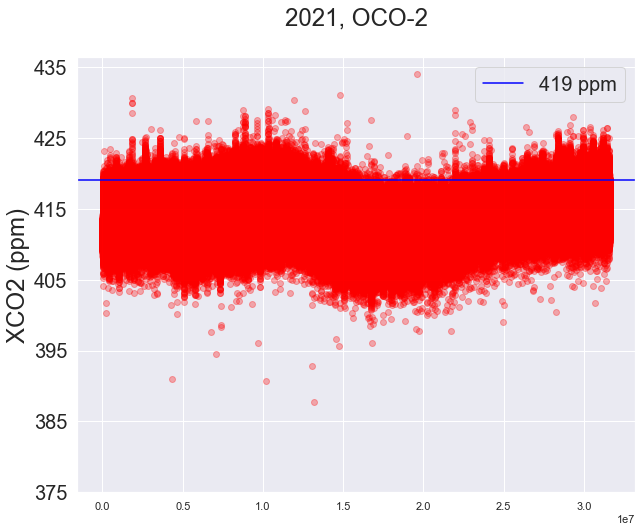

In [26]:
%%time
plt.scatter(x=np.arange(0, len(xco2_good_quality)), y= xco2_good_quality["Xco2"], c='red', alpha=0.30 )
plt.axhline(y= 419, color='blue', label= '419 ppm')
plt.yticks(np.arange(375, 445, 10), fontsize= 20)
plt.title('2021, OCO-2\n', fontsize= 24)
plt.legend(loc= 'upper right', prop={'size': 20})
plt.ylabel('XCO2 (ppm)', fontsize= 24)
plt.gcf().set_size_inches(10,8);

## Xco2Datapoints that higher than 419

In [27]:
# rev_dataframe.head(3)

In [ ]:
# xco2_max_419= xco2_good_quality[xco2_good_quality["Xco2"] >419]

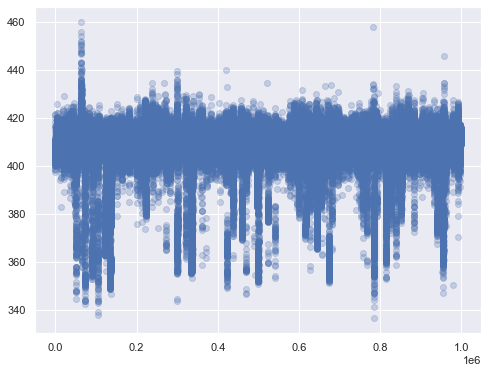

In [97]:
# plt.scatter(np.arange(0, len(rev_dataframe)), rev_dataframe["Xco2"], alpha= 0.25)
# plt.gcf().set_size_inches(8,6)

### Level 3 Data
#### Month

In [59]:
# Library to open `netcdf` file
import netCDF4
import xarray

#To pre-process data
import numpy as np
import pandas as pd

#To create visualization, graphs and plots
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#To create geospatial map, requires dependency installation
import plotly.express as px
from mpl_toolkits.basemap import Basemap

#To Display the content
from IPython.display import display, HTML, Image
from IPython import display
from datetime import datetime

In [297]:
file_path_L3_2021= []

for root, dirs, files in os.walk('C:/Users/Ochibobo/Arset/2021_L3_data'):
    for filename in files:
        print(os.path.join(root, filename))
        
        # Append the files into list
        file_path_L3_2021.append(os.path.join(root, filename))

C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201501_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201502_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201503_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201504_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201505_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201506_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201507_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201508_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201509_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201510_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201511_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2_month_201512_B10206Ar.nc4
C:/Users/Ochibobo/Arset/2021_L3_data\oco2_GEOS_L3CO2

In [313]:
len(file_path_L3_2021)

86

86 months i.e. Jan 2015 -> Feb 2020

## 2015

In [307]:
%time
data_xco2_2015 = []

for i in range(0, 12):
    data_xco2 = netCDF4.Dataset(file_path_L3_2021[i])
    data_xco2_2015.append(data_xco2)

CPU times: total: 0 ns
Wall time: 0 ns


In [312]:
list(data_xco2_2015[11].variables.keys())

['XCO2', 'XCO2PREC', 'lat', 'lon', 'time']

## Use Xarray to read file

In [315]:
df_xr_2015 = []

for i in range(0, 12):
    df_xr = xarray.open_dataset(file_path_L3_2021[i])
    df_xr_2015.append(df_xr)

In [320]:
df_xr_2015[11]

<xarray.Dataset>
Dimensions:   (time: 1, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 2015-12-16T12:00:00
Data variables:
    XCO2      (time, lat, lon) float64 ...
    XCO2PREC  (time, lat, lon) float64 ...
Attributes: (12/25)
    RangeBeginningDate:             2015-12-01
    RangeBeginningTime:             00:00:00.000000
    RangeEndingDate:                2015-12-01
    RangeEndingTime:                23:59:99.999999
    SpatialCoverage:                global
    SouthBoundingCoordinate:        -90.0
    ...                             ...
    ProductionDateTime:             2022-03-15T11:56:26Z
    History:                        Original file generated: Tue Mar 15 11:56...
    ShortName:                      OCO2_GEOS_L3CO2_MONTH_10r
    LongName:                       OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    Title:                          OCO-2 GEOS Level 3 monthly, 0.5x0.625 ass...
    IdentifierProductDOI:           10.5067/BGFIODET3HZ8

In [395]:
df_xco2_2015_Jan = df_xr_2015[0]["XCO2"][0].to_pandas()
df_xco2_2015_Jan

lon,-180.000,-179.375,-178.750,-178.125,-177.500,-176.875,-176.250,-175.625,-175.000,-174.375,...,173.750,174.375,175.000,175.625,176.250,176.875,177.500,178.125,178.750,179.375
lat,,,,,,,,,,,,,,,,,,,,,
-90.0,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
-89.5,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
-89.0,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
-88.5,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
-88.0,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,...,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395,0.000395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88.0,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,...,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401
88.5,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,...,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401
89.0,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,...,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401,0.000401


In [391]:
# import datetime

# #provide month number


# for i in range(0, 12):
#     month_num = str(i + 1)
#     datetime_object = datetime.datetime.strptime(month_num, "%m")

#     month_name = datetime_object.strftime("%b")
# #     print("Short name: ", f"df_xr_2015_" + month_name)
    
    
# #     full_month_name = datetime_object.strftime("%B")
# #     print("Full name: ",full_month_name)

# for i, j in enumerate(df_xco2_2015):
#     month_num = str(i + 1)
#     datetime_object = datetime.datetime.strptime(month_num, "%m")
#     month_name = datetime_object.strftime("%b")
#     month_name = f"df_xr_2015_" + month_name
    
# #     month_name = j
#     print(month_name)
# month_name

# Months_2015 = ['Jan_2015_df', 'Feb_2015_df', 'Mar_2015_df', 'Apr_2015_df', 'May_2015_df','Jun_2015_df', 'Jul_2015_df', 'Aug_2015_df',
#               'Sept_2015']

Short name:  df_xr_2015_Jan
Short name:  df_xr_2015_Feb
Short name:  df_xr_2015_Mar
Short name:  df_xr_2015_Apr
Short name:  df_xr_2015_May
Short name:  df_xr_2015_Jun
Short name:  df_xr_2015_Jul
Short name:  df_xr_2015_Aug
Short name:  df_xr_2015_Sep
Short name:  df_xr_2015_Oct
Short name:  df_xr_2015_Nov
Short name:  df_xr_2015_Dec


In [398]:
df_xco2_2015 = []

for i in range(0, 12):
#     name = f"df_xr_2015_" + str(Months[i])
#     name = df_xr_2015[i]["XCO2"][0].to_pandas()
    df = df_xr_2015[i]["XCO2"][0].to_pandas()
    name[i] = df_xco2_2015.append(df)
    
df_xco2_2015

[lon    -180.000  -179.375  -178.750  -178.125  -177.500  -176.875  -176.250  \
 lat                                                                           
 -90.0  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395   
 -89.5  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395   
 -89.0  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395   
 -88.5  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395   
 -88.0  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395  0.000395   
 ...         ...       ...       ...       ...       ...       ...       ...   
  88.0  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401   
  88.5  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401   
  89.0  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401   
  89.5  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401  0.000401   
  90.0  0.000401  0.000401  0.000401  0.

In [396]:
Jan_2015_df = pd.DataFrame(df_xco2_2015[0].unstack())
Jan_2015_df.rename(columns={0:'xco2'}, inplace = True)
Jan_2015_df
Jan_2015_df = Jan_2015_df['xco2'].reset_index()
Jan_2015_df['Year'] = 2015
Jan_2015_df['Month'] = 'January'
Jan_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000395,2015,January
1,-180.000,-89.5,0.000395,2015,January
2,-180.000,-89.0,0.000395,2015,January
3,-180.000,-88.5,0.000395,2015,January
4,-180.000,-88.0,0.000395,2015,January
...,...,...,...,...,...
207931,179.375,88.0,0.000401,2015,January
207932,179.375,88.5,0.000401,2015,January
207933,179.375,89.0,0.000401,2015,January
207934,179.375,89.5,0.000401,2015,January


In [400]:
Feb_2015_df = pd.DataFrame(df_xco2_2015[1].unstack())
Feb_2015_df.rename(columns={0:'xco2'}, inplace = True)
Feb_2015_df
Feb_2015_df = Feb_2015_df['xco2'].reset_index()
Feb_2015_df['Year'] = 2015
Feb_2015_df['Month'] = 'February'
Feb_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000395,2015,February
1,-180.000,-89.5,0.000395,2015,February
2,-180.000,-89.0,0.000395,2015,February
3,-180.000,-88.5,0.000395,2015,February
4,-180.000,-88.0,0.000395,2015,February
...,...,...,...,...,...
207931,179.375,88.0,0.000402,2015,February
207932,179.375,88.5,0.000402,2015,February
207933,179.375,89.0,0.000402,2015,February
207934,179.375,89.5,0.000402,2015,February


In [401]:
Mar_2015_df = pd.DataFrame(df_xco2_2015[2].unstack())
Mar_2015_df.rename(columns={0:'xco2'}, inplace = True)
Mar_2015_df
Mar_2015_df = Mar_2015_df['xco2'].reset_index()
Mar_2015_df['Year'] = 2015
Mar_2015_df['Month'] = 'March'
Mar_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000395,2015,March
1,-180.000,-89.5,0.000395,2015,March
2,-180.000,-89.0,0.000395,2015,March
3,-180.000,-88.5,0.000395,2015,March
4,-180.000,-88.0,0.000395,2015,March
...,...,...,...,...,...
207931,179.375,88.0,0.000403,2015,March
207932,179.375,88.5,0.000403,2015,March
207933,179.375,89.0,0.000403,2015,March
207934,179.375,89.5,0.000403,2015,March


In [402]:
Apr_2015_df = pd.DataFrame(df_xco2_2015[3].unstack())
Apr_2015_df.rename(columns={0:'xco2'}, inplace = True)
Apr_2015_df
Apr_2015_df = Apr_2015_df['xco2'].reset_index()
Apr_2015_df['Year'] = 2015
Apr_2015_df['Month'] = 'April'
Apr_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000395,2015,April
1,-180.000,-89.5,0.000395,2015,April
2,-180.000,-89.0,0.000395,2015,April
3,-180.000,-88.5,0.000395,2015,April
4,-180.000,-88.0,0.000395,2015,April
...,...,...,...,...,...
207931,179.375,88.0,0.000403,2015,April
207932,179.375,88.5,0.000403,2015,April
207933,179.375,89.0,0.000403,2015,April
207934,179.375,89.5,0.000403,2015,April


In [404]:
May_2015_df = pd.DataFrame(df_xco2_2015[4].unstack())
May_2015_df.rename(columns={0:'xco2'}, inplace = True)
May_2015_df
May_2015_df = May_2015_df['xco2'].reset_index()
May_2015_df['Year'] = 2015
May_2015_df['Month'] = 'May'
May_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000395,2015,May
1,-180.000,-89.5,0.000395,2015,May
2,-180.000,-89.0,0.000395,2015,May
3,-180.000,-88.5,0.000395,2015,May
4,-180.000,-88.0,0.000395,2015,May
...,...,...,...,...,...
207931,179.375,88.0,0.000403,2015,May
207932,179.375,88.5,0.000403,2015,May
207933,179.375,89.0,0.000403,2015,May
207934,179.375,89.5,0.000403,2015,May


In [405]:
Jun_2015_df = pd.DataFrame(df_xco2_2015[5].unstack())
Jun_2015_df.rename(columns={0:'xco2'}, inplace = True)
Jun_2015_df
Jun_2015_df = Jun_2015_df['xco2'].reset_index()
Jun_2015_df['Year'] = 2015
Jun_2015_df['Month'] = 'June'
Jun_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000396,2015,June
1,-180.000,-89.5,0.000396,2015,June
2,-180.000,-89.0,0.000395,2015,June
3,-180.000,-88.5,0.000395,2015,June
4,-180.000,-88.0,0.000395,2015,June
...,...,...,...,...,...
207931,179.375,88.0,0.000400,2015,June
207932,179.375,88.5,0.000400,2015,June
207933,179.375,89.0,0.000400,2015,June
207934,179.375,89.5,0.000400,2015,June


In [406]:
Jul_2015_df = pd.DataFrame(df_xco2_2015[6].unstack())
Jul_2015_df.rename(columns={0:'xco2'}, inplace = True)
Jul_2015_df
Jul_2015_df = Jul_2015_df['xco2'].reset_index()
Jul_2015_df['Year'] = 2015
Jul_2015_df['Month'] = 'July'
Jul_2015_df

,lon,lat,xco2,Year,Month
0,-180.000,-90.0,0.000396,2015,July
1,-180.000,-89.5,0.000396,2015,July
2,-180.000,-89.0,0.000396,2015,July
3,-180.000,-88.5,0.000396,2015,July
4,-180.000,-88.0,0.000396,2015,July
...,...,...,...,...,...
207931,179.375,88.0,0.000395,2015,July
207932,179.375,88.5,0.000395,2015,July
207933,179.375,89.0,0.000395,2015,July
207934,179.375,89.5,0.000395,2015,July


In [ ]:
Aug_2015_df = pd.DataFrame(df_xco2_2015[7].unstack())
Aug_2015_df.rename(columns={0:'xco2'}, inplace = True)
Aug_2015_df
Aug_2015_df = Aug_2015_df['xco2'].reset_index()
Aug_2015_df['Year'] = 2015
Aug_2015_df['Month'] = 'July'
Jul_2015_df

In [64]:
df_xr["XCO2PREC"][:]

<xarray.DataArray 'XCO2PREC' (time: 1, lat: 361, lon: 576)>
[207936 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time     (time) datetime64[ns] 2021-01-16T12:00:00
Attributes:
    units:      mol CO2/mol dry
    long_name:  Precision of dry-air column average CO2 daily mean from Desro...
    comment:    Error budget of monthly means is primarily bias (not provided...

In [65]:
df_xr["lat"][:]

<xarray.DataArray 'lat' (lat: 361)>
array([-90. , -89.5, -89. , ...,  89. ,  89.5,  90. ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [66]:
df_xr["lon"][:]

<xarray.DataArray 'lon' (lon: 576)>
array([-180.   , -179.375, -178.75 , ...,  178.125,  178.75 ,  179.375])
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Attributes:
    units:      degrees_east
    long_name:  longitude

In [318]:
df_xco2 = df_xr["XCO2"][0].to_pandas()
df_xco2

lon,-180.000,-179.375,-178.750,-178.125,-177.500,-176.875,-176.250,-175.625,-175.000,-174.375,...,173.750,174.375,175.000,175.625,176.250,176.875,177.500,178.125,178.750,179.375
lat,,,,,,,,,,,,,,,,,,,,,
-90.0,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
-89.5,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
-89.0,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
-88.5,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
-88.0,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,...,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397,0.000397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88.0,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,...,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402
88.5,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,...,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402
89.0,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,...,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402,0.000402


In [190]:
new_df = pd.DataFrame(df_xco2.unstack())
new_df.rename(columns={0:'xco2'}, inplace = True)
new_df

xco2
lon      lat            
-180.000 -90.0  0.000410
         -89.5  0.000410
         -89.0  0.000410
         -88.5  0.000409
         -88.0  0.000409
...                  ...
 179.375  88.0  0.000416
          88.5  0.000416
          89.0  0.000416
          89.5  0.000416
          90.0  0.000416

[207936 rows x 1 columns]

In [191]:
new_df = new_df['xco2'].reset_index()
new_df

,lon,lat,xco2
0,-180.000,-90.0,0.000410
1,-180.000,-89.5,0.000410
2,-180.000,-89.0,0.000410
3,-180.000,-88.5,0.000409
4,-180.000,-88.0,0.000409
...,...,...,...
207931,179.375,88.0,0.000416
207932,179.375,88.5,0.000416
207933,179.375,89.0,0.000416
207934,179.375,89.5,0.000416


In [192]:
new_df.rename(columns = {'lon': 'longitude', 'lat': 'latitude'}, inplace = True)
new_df

,longitude,latitude,xco2
0,-180.000,-90.0,0.000410
1,-180.000,-89.5,0.000410
2,-180.000,-89.0,0.000410
3,-180.000,-88.5,0.000409
4,-180.000,-88.0,0.000409
...,...,...,...
207931,179.375,88.0,0.000416
207932,179.375,88.5,0.000416
207933,179.375,89.0,0.000416
207934,179.375,89.5,0.000416


In [193]:
#Convert to parts per million
new_df['xco2'] = new_df['xco2'] * 1000000 
new_df

,longitude,latitude,xco2
0,-180.000,-90.0,409.575587
1,-180.000,-89.5,409.550819
2,-180.000,-89.0,409.520025
3,-180.000,-88.5,409.490761
4,-180.000,-88.0,409.482761
...,...,...,...
207931,179.375,88.0,415.699448
207932,179.375,88.5,415.704852
207933,179.375,89.0,415.721010
207934,179.375,89.5,415.750636


## Global Power Plant Database

In [28]:
import pandas as pd

POWER_PLANT_URL = (
    "https://raw.githubusercontent.com/MarcSkovMadsen/awesome-streamlit/master/"
    "gallery/global_power_plant_database/global_power_plant_database.csv"
)

pp_data = pd.read_csv(POWER_PLANT_URL)
pp_data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
df_xco2.loc[32].loc[65]

0.00041431559633741516

In [29]:
pp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29910 entries, 0 to 29909
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   29910 non-null  object 
 1   country_long              29910 non-null  object 
 2   name                      29910 non-null  object 
 3   gppd_idnr                 29910 non-null  object 
 4   capacity_mw               29910 non-null  float64
 5   latitude                  29910 non-null  float64
 6   longitude                 29910 non-null  float64
 7   primary_fuel              29910 non-null  object 
 8   other_fuel1               1963 non-null   object 
 9   other_fuel2               303 non-null    object 
 10  other_fuel3               104 non-null    object 
 11  commissioning_year        16303 non-null  float64
 12  owner                     19531 non-null  object 
 13  source                    29895 non-null  object 
 14  url   

In [33]:
pp_data['year_of_capacity_data'].value_counts()

2017.0    12015
2016.0      781
2018.0      566
2015.0      281
2000.0       58
2014.0       20
2013.0       14
2012.0        6
2009.0        1
2010.0        1
Name: year_of_capacity_data, dtype: int64

In [243]:
pp_data_rev = pp_data[[
    "latitude","longitude", "name", "country_long", "capacity_mw", "geolocation_source"
    ]
]
pp_data_rev

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
0,32.3220,65.1190,Kajaki Hydroelectric Power Plant Afghanistan,Afghanistan,33.00,GEODB
1,34.5560,69.4787,Mahipar Hydroelectric Power Plant Afghanistan,Afghanistan,66.00,GEODB
2,34.6410,69.7170,Naghlu Dam Hydroelectric Power Plant Afghanistan,Afghanistan,100.00,GEODB
3,34.4847,70.3633,Nangarhar (Darunta) Hydroelectric Power Plant ...,Afghanistan,11.55,GEODB
4,34.5638,69.1134,Northwest Kabul Power Plant Afghanistan,Afghanistan,42.00,GEODB
...,...,...,...,...,...,...
29905,-12.9667,28.6333,Ndola,Zambia,50.00,Power Africa
29906,-12.8167,28.2000,Nkana,Zambia,20.00,Power Africa
29907,-17.9167,25.8500,Victoria Falls,Zambia,108.00,Power Africa
29908,-18.3835,26.4700,Hwange Coal Power Plant Zimbabwe,Zimbabwe,920.00,GEODB


In [244]:
#Check if there are null capacity values
pp_data_rev['capacity_mw'].isnull().sum()

0

All power plants have capacity values. Let's explore the distribution of powerplants 

In [245]:
pp_data_rev['country_long'].value_counts()

United States of America    8686
China                       3041
United Kingdom              2536
Brazil                      2340
France                      2017
                            ... 
Zimbabwe                       2
Lesotho                        1
Western Sahara                 1
Djibouti                       1
Guinea-Bissau                  1
Name: country_long, Length: 164, dtype: int64

## India

In [249]:
india_pp_data = pp_data_rev[pp_data_rev['country_long'] == 'India']
india_pp_data

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
12088,28.1839,73.2407,ACME Solar Tower,India,2.5,National Renewable Energy Laboratory
12089,24.7663,74.6090,ADITYA CEMENT WORKS,India,98.0,WRI
12090,21.9038,69.3732,AES Saurashtra Windfarms,India,39.2,WRI
12091,23.8712,91.3602,AGARTALA GT,India,135.0,WRI
12092,21.9603,82.4091,AKALTARA TPP,India,1800.0,WRI
...,...,...,...,...,...,...
12944,16.2949,77.3568,YERMARUS TPP,India,1600.0,WRI
12945,12.8932,78.1654,Yelesandra Solar Power Plant,India,3.0,Industry About
12946,15.2758,75.5811,Yelisirur wind power project,India,25.5,WRI
12947,24.3500,73.7477,ZAWAR MINES,India,80.0,WRI


## Kenya

In [250]:
Kenya_pp_data = pp_data_rev[pp_data_rev['country_long'] == 'Kenya']
Kenya_pp_data

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
13974,-0.7967,37.7497,Gitaru,Kenya,225.0,WRI
13975,-1.2431,36.8905,Iberafrica I & II (Nairobi south diesel PP),Kenya,109.0,WRI
13976,-0.8093,37.6867,Kamburu,Kenya,94.2,GEODB
13977,-0.6400,37.9100,Kiambere,Kenya,168.0,GEODB
13978,-0.8060,37.8110,Kindaruma,Kenya,72.0,GEODB
13979,-4.0400,39.6380,Kipevu I,Kenya,74.0,GEODB
13980,-4.0379,39.6333,Kipevu II (Tsavo),Kenya,74.5,GEODB
13981,-4.0379,39.6333,Kipevu III,Kenya,120.0,GEODB
13982,2.6447,36.7378,Lake Turkana,Kenya,310.0,WRI
13983,-0.8790,37.5880,Masinga,Kenya,40.0,GEODB


## USA

In [251]:
US_pp_data = pp_data_rev[pp_data_rev['country_long'] == 'United States of America']
US_pp_data

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
20849,40.2003,-74.5761,12 Applegate Solar LLC,United States of America,1.9,U.S. Energy Information Administration
20850,42.0761,-71.4227,126 Grove Solar LLC,United States of America,2.0,U.S. Energy Information Administration
20851,33.7943,-118.2414,1420 Coil Av #C,United States of America,1.3,U.S. Energy Information Administration
20852,40.5358,-74.3913,145 Talmadge Solar,United States of America,3.8,U.S. Energy Information Administration
20853,41.9084,-89.0466,1515 S Caron Road,United States of America,4.2,U.S. Energy Information Administration
...,...,...,...,...,...,...
29530,42.4776,-87.8950,Zion Energy Center,United States of America,596.7,U.S. Energy Information Administration
29531,42.4803,-87.8861,Zion Landfill Gas to Energy Facility,United States of America,7.0,U.S. Energy Information Administration
29532,38.2803,-85.7023,Zorn,United States of America,18.0,U.S. Energy Information Administration
29533,42.8869,-76.9683,Zotos International WPGF,United States of America,3.4,U.S. Energy Information Administration


## Brazil

In [252]:
Brazil_pp_data = pp_data_rev[pp_data_rev['country_long'] == 'Brazil']
Brazil_pp_data

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
1045,-29.0648,-51.6749,14 de Julho,Brazil,100.7100,Agência Nacional de Energia Elétrica (Brazil)
1046,-23.5927,-48.0901,3M Itapetininga,Brazil,3.8400,Agência Nacional de Energia Elétrica (Brazil)
1047,-22.8152,-47.1781,3M Sumaré,Brazil,6.4000,Agência Nacional de Energia Elétrica (Brazil)
1048,-23.9277,-52.4869,AJ Rorato,Brazil,2.1900,Agência Nacional de Energia Elétrica (Brazil)
1049,-23.5218,-46.6691,ALLIANZ PARQUE,Brazil,3.8744,Agência Nacional de Energia Elétrica (Brazil)
...,...,...,...,...,...,...
3380,-11.6922,-46.7050,Água Limpa,Brazil,14.0000,Agência Nacional de Energia Elétrica (Brazil)
3381,-26.0089,-51.0570,Água Santa,Brazil,1.0000,Agência Nacional de Energia Elétrica (Brazil)
3382,-19.8511,-50.3456,Água Vermelha (Antiga José Ermírio de Moraes),Brazil,1396.2000,Agência Nacional de Energia Elétrica (Brazil)
3383,-11.9300,-62.1008,Ângelo Cassol,Brazil,3.6000,Agência Nacional de Energia Elétrica (Brazil)


In [253]:
pd_List = [india_pp_data, Kenya_pp_data, US_pp_data, Brazil_pp_data]
new_pp_df = pd.concat(pd_List)
new_pp_df

,latitude,longitude,name,country_long,capacity_mw,geolocation_source
12088,28.1839,73.2407,ACME Solar Tower,India,2.5,National Renewable Energy Laboratory
12089,24.7663,74.6090,ADITYA CEMENT WORKS,India,98.0,WRI
12090,21.9038,69.3732,AES Saurashtra Windfarms,India,39.2,WRI
12091,23.8712,91.3602,AGARTALA GT,India,135.0,WRI
12092,21.9603,82.4091,AKALTARA TPP,India,1800.0,WRI
...,...,...,...,...,...,...
3380,-11.6922,-46.7050,Água Limpa,Brazil,14.0,Agência Nacional de Energia Elétrica (Brazil)
3381,-26.0089,-51.0570,Água Santa,Brazil,1.0,Agência Nacional de Energia Elétrica (Brazil)
3382,-19.8511,-50.3456,Água Vermelha (Antiga José Ermírio de Moraes),Brazil,1396.2,Agência Nacional de Energia Elétrica (Brazil)
3383,-11.9300,-62.1008,Ângelo Cassol,Brazil,3.6,Agência Nacional de Energia Elétrica (Brazil)


## Level 2 data

In [37]:
merged_pp_data = xco2_good_quality.merge(pp_data, how = 'right', on = ['latitude', 'longitude'] )

In [38]:
merged_pp_data

,Xco2,quality_flag,latitude,longitude,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,NaN,NaN,32.3220,65.1190,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,Hydro,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,34.5560,69.4787,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,Hydro,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,34.6410,69.7170,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,Hydro,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,34.4847,70.3633,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,Hydro,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,34.5638,69.1134,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,Gas,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,NaN,NaN,-12.9667,28.6333,ZMB,Zambia,Ndola,WRI1022386,50.00,Oil,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
29906,NaN,NaN,-12.8167,28.2000,ZMB,Zambia,Nkana,WRI1022384,20.00,Oil,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
29907,NaN,NaN,-17.9167,25.8500,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,Hydro,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.100000
29908,NaN,NaN,-18.3835,26.4700,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,Coal,...,http://globalenergyobservatory.org,GEODB,1033856,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000


In [39]:
merged_pp_data['Xco2'].isnull().sum()

29910

## Level 3 data

In [194]:
merged_pp_L3_data = new_df.merge(pp_data, how = 'right', on = ['latitude', 'longitude'] )

In [195]:
merged_pp_L3_data

,longitude,latitude,xco2,country,country_long,name,gppd_idnr,capacity_mw,primary_fuel,other_fuel1,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,65.1190,32.3220,NaN,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,Hydro,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,69.4787,34.5560,NaN,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,Hydro,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,69.7170,34.6410,NaN,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,Hydro,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,70.3633,34.4847,NaN,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,Hydro,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,69.1134,34.5638,NaN,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,Gas,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29905,28.6333,-12.9667,NaN,ZMB,Zambia,Ndola,WRI1022386,50.00,Oil,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1089529,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
29906,28.2000,-12.8167,NaN,ZMB,Zambia,Nkana,WRI1022384,20.00,Oil,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1043097,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
29907,25.8500,-17.9167,NaN,ZMB,Zambia,Victoria Falls,WRI1022380,108.00,Hydro,NaN,...,http://www.erb.org.zm/reports/EnergySectorRepo...,Power Africa,1033763,NaN,NaN,NaN,NaN,NaN,NaN,702.100000
29908,26.4700,-18.3835,NaN,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.00,Coal,NaN,...,http://globalenergyobservatory.org,GEODB,1033856,2017.0,NaN,NaN,NaN,NaN,NaN,4397.000000


In [196]:
merged_pp_data['Xco2'].isnull().sum()

29910

## World Cities Database

[World Cities Database](https://simplemaps.com/data/world-cities) is proud to offer a simple, accurate and up-to-date database of the world's cities and towns under a creative commons license. Commercial use is allowed and is built from the ground up using authoritative sources such as the NGIA, US Geological Survey, US Census Bureau, and NASA.
   
The database is:

- Up-to-date: It was last refreshed in March 2022.
- Comprehensive: Over 4 million unique cities and towns from every country in the world.
- Accurate: Cleaned and aggregated from official sources. 
- Includes latitude and longitude coordinates.
- Simple: A single CSV file, concise field names, only one entry per city.

### Downloading the Data
We can download the datasets directly using the open datasets library

In [199]:
od.download('https://simplemaps.com/static/data/world-cities/basic/simplemaps_worldcities_basicv1.75.zip')

4399104it [00:07, 620858.12it/s]                             


In [200]:
#Check the downloaded files
import os
os.listdir()

['.ipynb_checkpoints',
 '.jovianrc',
 '.urs_cookies',
 '2021_data',
 '2021_L3_data',
 '2021_path_to_OCO-2.txt',
 'cali_json_oco2.json',
 'cali_oco2_2020.csv',
 'CARMAv30_PowerUser.zip',
 'Colab.PNG',
 'Download from GES Disc.ipynb',
 'file_path_2021',
 'frames',
 'GC-Basemap.html',
 'Global Coverage.html',
 'Global-Steel-Plant-Tracker-March-2022.xlsx',
 'Global.PNG',
 'Global_coverage.html',
 'Heatmap-example.html',
 'hexagon-example.html',
 'Multiple FIles.ipynb',
 'NETCDF to CSV.ipynb',
 'oco2_LtCO2_200110_B10206Ar_200728203614s.SUB.nc4',
 'OCO2_OCO3.ipynb',
 'OCO3.PNG',
 'oco3_aug_2019.csv',
 'owid-co2-codebook.csv',
 'Pydap Access Earth Data.ipynb',
 'Pydeck Map Visuals.ipynb',
 'Reading files from Open Data.ipynb',
 'Reading OCO2 - OCO3 cluster files.ipynb',
 'Reading OCO2 Cluster files.ipynb',
 'scatterplot-example.html',
 'scatterplot2-example.html',
 'simplemaps_worldcities_basicv1.75.zip',
 'Spatial Air Quality.ipynb',
 'subset_OCO2_GEOS_L3CO2_MONTH_10r_20220816_082043.txt',
 

The file `simplemaps_worldcities_basicv1.75.zip` has been downloaded and is in zip format. Let's unzip them using the zipfile module.

In [202]:
from zipfile import ZipFile

In [204]:
#Unzip the file and store the contents in a folder named world cities
with ZipFile('C:/Users/Ochibobo/Arset/simplemaps_worldcities_basicv1.75.zip') as f:
    f.extractall(path = 'world_cities')

In [205]:
#Check the unzipped files
os.listdir('world_cities')

['license.txt', 'worldcities.csv', 'worldcities.xlsx']

In [207]:
world_cities_df = pd.read_csv('C:/Users/Ochibobo/Arset/world_cities/worldcities.csv')
world_cities_df

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [208]:
world_cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42905 entries, 0 to 42904
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        42905 non-null  object 
 1   city_ascii  42905 non-null  object 
 2   lat         42905 non-null  float64
 3   lng         42905 non-null  float64
 4   country     42905 non-null  object 
 5   iso2        42873 non-null  object 
 6   iso3        42905 non-null  object 
 7   admin_name  42810 non-null  object 
 8   capital     9812 non-null   object 
 9   population  42180 non-null  float64
 10  id          42905 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 3.6+ MB


In [254]:
world_cities_df.rename(columns = {'lat': 'latitude', 'lng' : 'longitude'}, inplace = True)
world_cities_df

,city,city_ascii,latitude,longitude,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6839,139.7744,Japan,JP,JPN,Tōkyō,primary,39105000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,35362000.0,1360771077
2,Delhi,Delhi,28.6667,77.2167,India,IN,IND,Delhi,admin,31870000.0,1356872604
3,Manila,Manila,14.6000,120.9833,Philippines,PH,PHL,Manila,primary,23971000.0,1608618140
4,São Paulo,Sao Paulo,-23.5504,-46.6339,Brazil,BR,BRA,São Paulo,admin,22495000.0,1076532519
...,...,...,...,...,...,...,...,...,...,...,...
42900,Tukchi,Tukchi,57.3670,139.5000,Russia,RU,RUS,Khabarovskiy Kray,NaN,10.0,1643472801
42901,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
42902,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
42903,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491


In [267]:
world_cities_df['country'].value_counts()

United States               7824
Brazil                      3604
Germany                     2643
Italy                       2140
France                      2019
                            ... 
Cook Islands                   1
Grenada                        1
Martinique                     1
Northern Mariana Islands       1
U.S. Virgin Islands            1
Name: country, Length: 239, dtype: int64

In [276]:
rev_cities_df = world_cities_df[['city', 'longitude', 'latitude', 'country', 'population']]
rev_cities_df

,city,longitude,latitude,country,population
0,Tokyo,139.7744,35.6839,Japan,39105000.0
1,Jakarta,106.8451,-6.2146,Indonesia,35362000.0
2,Delhi,77.2167,28.6667,India,31870000.0
3,Manila,120.9833,14.6000,Philippines,23971000.0
4,São Paulo,-46.6339,-23.5504,Brazil,22495000.0
...,...,...,...,...,...
42900,Tukchi,139.5000,57.3670,Russia,10.0
42901,Numto,71.3333,63.6667,Russia,10.0
42902,Nord,-17.8000,81.7166,Greenland,10.0
42903,Timmiarmiut,-42.2167,62.5333,Greenland,10.0


In [278]:
US_cities = rev_cities_df[rev_cities_df['country'] == 'United States']
US_cities

,city,longitude,latitude,country,population
12,New York,-73.9249,40.6943,United States,18713220.0
27,Los Angeles,-118.4068,34.1139,United States,12750807.0
51,Chicago,-87.6862,41.8373,United States,8604203.0
91,Miami,-80.2102,25.7839,United States,6445545.0
108,Dallas,-96.7662,32.7936,United States,5743938.0
...,...,...,...,...,...
42008,Ridgeland,-80.9176,32.4680,United States,5005.0
42009,Dwight,-88.4240,41.0987,United States,5005.0
42010,Oak Park Heights,-92.8099,45.0324,United States,5003.0
42011,Gillespie,-89.8173,39.1258,United States,5002.0


In [279]:
India_cities = rev_cities_df[rev_cities_df['country'] == 'India']
India_cities

,city,longitude,latitude,country,population
2,Delhi,77.2167,28.6667,India,31870000.0
6,Mumbai,72.8775,19.0758,India,22186000.0
13,Kolkāta,88.3639,22.5727,India,18698000.0
24,Bangalore,77.5913,12.9791,India,13999000.0
31,Chennai,80.2750,13.0825,India,11564000.0
...,...,...,...,...,...
42444,Tuggali,77.5833,15.3667,India,6847.0
42455,Mulakalapalle,80.9247,17.5758,India,6679.0
42491,Somapalle,78.2667,13.8500,India,6366.0
42599,Mallavaram,81.8500,17.2670,India,5492.0


In [280]:
Brazil_cities = rev_cities_df[rev_cities_df['country'] == 'Brazil']
Brazil_cities

,city,longitude,latitude,country,population
4,São Paulo,-46.6339,-23.5504,Brazil,22495000.0
28,Rio de Janeiro,-43.1964,-22.9083,Brazil,12486000.0
138,Belo Horizonte,-43.9419,-19.9281,Brazil,5159000.0
251,Brasília,-47.8828,-15.7939,Brazil,3015268.0
269,Salvador,-38.5108,-12.9708,Brazil,2886698.0
...,...,...,...,...,...
41991,Bocaina de Minas,-44.3950,-22.1678,Brazil,5007.0
41994,Ibertioga,-43.9628,-21.4300,Brazil,5010.0
41996,Couto de Magalhães,-49.2469,-8.2839,Brazil,5009.0
42186,Príncipe da Beira,-64.4166,-12.4167,Brazil,956.0


In [282]:
Kenya_cities = rev_cities_df[rev_cities_df['country'] == 'Kenya']
Kenya_cities

,city,longitude,latitude,country,population
117,Nairobi,36.8172,-1.2864,Kenya,5545000.0
407,Meru,37.6500,0.0500,Kenya,1833000.0
567,Mombasa,39.6667,-4.0500,Kenya,1200000.0
1627,Kisumu,34.7500,-0.1000,Kenya,409928.0
1914,Nakuru,36.0667,-0.2833,Kenya,307990.0
...,...,...,...,...,...
37123,Dadaab,40.3086,0.0531,Kenya,5723.0
42094,Karungu,34.1500,-0.8496,Kenya,2376.0
42618,Witu,40.4300,-2.3796,Kenya,5380.0
42753,Konza,37.1200,-1.7496,Kenya,2004.0


In [284]:
pd_List = [India_cities, Kenya_cities, US_cities, Brazil_cities]
new_cities_df = pd.concat(pd_List)
new_cities_df

,city,longitude,latitude,country,population
2,Delhi,77.2167,28.6667,India,31870000.0
6,Mumbai,72.8775,19.0758,India,22186000.0
13,Kolkāta,88.3639,22.5727,India,18698000.0
24,Bangalore,77.5913,12.9791,India,13999000.0
31,Chennai,80.2750,13.0825,India,11564000.0
...,...,...,...,...,...
41991,Bocaina de Minas,-44.3950,-22.1678,Brazil,5007.0
41994,Ibertioga,-43.9628,-21.4300,Brazil,5010.0
41996,Couto de Magalhães,-49.2469,-8.2839,Brazil,5009.0
42186,Príncipe da Beira,-64.4166,-12.4167,Brazil,956.0


## Cities and Power plants

In [294]:
new_pp_df.rename(columns = {'country_long' : 'country'}, inplace = True)
new_pp_df

,latitude,longitude,name,country,capacity_mw,geolocation_source
12088,28.1839,73.2407,ACME Solar Tower,India,2.5,National Renewable Energy Laboratory
12089,24.7663,74.6090,ADITYA CEMENT WORKS,India,98.0,WRI
12090,21.9038,69.3732,AES Saurashtra Windfarms,India,39.2,WRI
12091,23.8712,91.3602,AGARTALA GT,India,135.0,WRI
12092,21.9603,82.4091,AKALTARA TPP,India,1800.0,WRI
...,...,...,...,...,...,...
3380,-11.6922,-46.7050,Água Limpa,Brazil,14.0,Agência Nacional de Energia Elétrica (Brazil)
3381,-26.0089,-51.0570,Água Santa,Brazil,1.0,Agência Nacional de Energia Elétrica (Brazil)
3382,-19.8511,-50.3456,Água Vermelha (Antiga José Ermírio de Moraes),Brazil,1396.2,Agência Nacional de Energia Elétrica (Brazil)
3383,-11.9300,-62.1008,Ângelo Cassol,Brazil,3.6,Agência Nacional de Energia Elétrica (Brazil)


In [293]:
new_cities_df

,city,longitude,latitude,country,population
2,Delhi,77.2167,28.6667,India,31870000.0
6,Mumbai,72.8775,19.0758,India,22186000.0
13,Kolkāta,88.3639,22.5727,India,18698000.0
24,Bangalore,77.5913,12.9791,India,13999000.0
31,Chennai,80.2750,13.0825,India,11564000.0
...,...,...,...,...,...
41991,Bocaina de Minas,-44.3950,-22.1678,Brazil,5007.0
41994,Ibertioga,-43.9628,-21.4300,Brazil,5010.0
41996,Couto de Magalhães,-49.2469,-8.2839,Brazil,5009.0
42186,Príncipe da Beira,-64.4166,-12.4167,Brazil,956.0


## OWID DATA

In [209]:
od.download('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv')

Using downloaded and verified file: .\owid-co2-codebook.csv


In [211]:
owid_Codebook = pd.read_csv('C:/Users/Ochibobo/Arset/owid-co2-codebook.csv')

In [212]:
owid_Codebook

,column,description,source
0,iso_code,ISO 3166-1 alpha-3 – three-letter country codes,International Organization for Standardization
1,country,Geographic location,Our World in Data
2,year,Year of observation,Our World in Data
3,co2,Annual production-based emissions of carbon di...,Global Carbon Project
4,co2_per_capita,Annual production-based emissions of carbon di...,Our World in Data based on the Global Carbon P...
5,trade_co2,Annual net carbon dioxide (CO2) emissions embe...,Our World in Data based on the Global Carbon P...
6,cement_co2,Annual production-based emissions of carbon di...,Global Carbon Project
7,cement_co2_per_capita,Annual production-based emissions of carbon di...,Our World in Data based on the Global Carbon P...
8,coal_co2,Annual production-based emissions of carbon di...,Global Carbon Project
9,coal_co2_per_capita,Annual production-based emissions of carbon di...,Our World in Data based on the Global Carbon P...


In [213]:
owid_df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')
owid_df

,iso_code,country,year,co2,co2_per_capita,trade_co2,cement_co2,cement_co2_per_capita,coal_co2,coal_co2_per_capita,...,ghg_excluding_lucf_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,0.002,NaN,NaN,NaN,0.015,0.002,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,0.011,NaN,NaN,NaN,0.021,0.003,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,0.012,NaN,NaN,NaN,0.026,0.003,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,0.012,NaN,NaN,NaN,0.032,0.004,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001733e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,0.013,NaN,NaN,NaN,0.038,0.005,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25984,ZWE,Zimbabwe,2016,10.738,0.765,1.415,0.639,0.046,6.959,0.496,...,2.076,11.50,0.820,6.21,0.443,14030338.0,2.096179e+10,46.666,3326.073,2.226
25985,ZWE,Zimbabwe,2017,9.582,0.673,1.666,0.678,0.048,5.665,0.398,...,2.023,11.62,0.816,6.35,0.446,14236599.0,2.194784e+10,45.936,3226.617,2.093
25986,ZWE,Zimbabwe,2018,11.854,0.821,1.308,0.697,0.048,7.101,0.492,...,2.173,11.96,0.828,6.59,0.456,14438812.0,2.271535e+10,47.502,3289.887,2.091
25987,ZWE,Zimbabwe,2019,10.949,0.748,1.473,0.697,0.048,6.020,0.411,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,49.427,3374.877,NaN


In [214]:
owid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25989 entries, 0 to 25988
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21960 non-null  object 
 1   country                              25989 non-null  object 
 2   year                                 25989 non-null  int64  
 3   co2                                  24670 non-null  float64
 4   co2_per_capita                       24032 non-null  float64
 5   trade_co2                            4096 non-null   float64
 6   cement_co2                           12668 non-null  float64
 7   cement_co2_per_capita                12638 non-null  float64
 8   coal_co2                             17909 non-null  float64
 9   coal_co2_per_capita                  17536 non-null  float64
 10  flaring_co2                          4641 non-null   float64
 11  flaring_co2_per_capita      

## Global Steel Plant Tracker by Global Energy Monitor

In [216]:
#Read in the Excel workbook
Global_Steel_plants = pd.ExcelFile('C:/Users/Ochibobo/Arset/Global-Steel-Plant-Tracker-March-2022.xlsx')

In [217]:
#Check the Excel Files
Global_Steel_plants.sheet_names

['About', 'Steel Plants', 'Yearly Production', 'Metadata']

In [220]:
# Define a function to return dataframes/files

# Excel File path
path = 'C:/Users/Ochibobo/Arset/Global-Steel-Plant-Tracker-March-2022.xlsx'

def extract_df(sheet_name):
  if sheet_name in Global_Steel_plants.sheet_names:
    dataframe = pd.read_excel(path, sheet_name = sheet_name)
  else:
    print ('Sheet name not found')

  return dataframe

In [221]:
About = extract_df('About')
About

,Unnamed: 0,Global Steel Plant Tracker - March 2022,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Copyright © 2022 by Global Energy Monitor. Dis...,NaN
2,NaN,"Contact: Caitlin Swalec, Global Steel Plant Tr...",NaN
3,NaN,"Citation: ""Global Steel Plant Tracker,"" Global...",NaN
4,NaN,Notes,NaN
5,NaN,"1. For background, additional infomation, and ...",NaN
6,NaN,"2. For the Methodology, see https://globalener...",NaN
7,NaN,"3. For summary statistics by province, country...",NaN
8,NaN,"4. For links to reports using GSPT data, see ""...",NaN
9,NaN,5. This database only includes iron and steelm...,NaN


In [222]:
Metadata = extract_df('Metadata')
Metadata

,"""Steel Plants"" data",Unnamed: 1
0,Column Name,Description
1,Plant ID,One unique GEM identifier is assigned to each ...
2,Plant name (English),Common plant name for steel plant in English l...
3,Plant name (other language),Common plant name for steel plant in other lan...
4,Other plant names (English),Other plant names for steel plant in English l...
...,...,...
57,EAF steel production (ttpa),Plant production for steel produced by EAF rou...
58,OHF steel production (ttpa),Plant production for steel produced by OHF rou...
59,Iron production (ttpa),Plant production across all ironmaking process...
60,BF production (ttpa),Plant production for iron produced by BF route...


In [223]:
Metadata['"Steel Plants" data']

0                      Column Name
1                         Plant ID
2             Plant name (English)
3      Plant name (other language)
4      Other plant names (English)
                  ...             
57    EAF steel production  (ttpa)
58     OHF steel production (ttpa)
59          Iron production (ttpa)
60            BF production (ttpa)
61           DRI production (ttpa)
Name: "Steel Plants" data, Length: 62, dtype: object

In [224]:
Metadata.loc[Metadata['"Steel Plants" data'] == 'Coordinates']

,"""Steel Plants"" data",Unnamed: 1
18,Coordinates,Coordinates of steel plant.


In [225]:
Steel_plants = extract_df('Steel Plants')
Steel_plants.head(2)

,Plant ID,Plant name (English),Plant name (other language),Other plant names (English),Other plant names (other language),SOE status,SOE state department,Parent,Parent PermID,Owner,...,Workforce size,ISO14001,ISO50001,ResponsibleSteel Certification,Main production process,Main production equipment,Detailed production equipment,Power source,Iron ore source,Met coal source
0,SDZ00001,Algerian Qatari Steel Jijel plant,الجزائرية القطرية للصلب (Arabic),AQS,NaN,full,Qatar Steel,Qatar Steel Company QPSC [49%]; Groupe Industr...,5000010731 [49%]; 5000941519 [46%]; GEM0000000...,Algerian Qatari Steel,...,1500,NaN,NaN,NaT,integrated (DRI),"DRI, EAF","1 Midrex DRI plant (2.5 MTPA, began in 2019); ...",NaN,NaN,NaN
1,SAO00001,Aceria Angola Bengo steel plant,NaN,ADA Steel,NaN,NaN,NaN,Aceria Angola [100%],GEM0000001 [100%],Aceria Angola,...,600,unknown,unknown,NaT,electric,EAF,EAF (# unknown),NaN,NaN,NaN


In [226]:
Steel_plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Plant ID                             1201 non-null   object        
 1   Plant name (English)                 1201 non-null   object        
 2   Plant name (other language)          721 non-null    object        
 3   Other plant names (English)          694 non-null    object        
 4   Other plant names (other language)   272 non-null    object        
 5   SOE status                           231 non-null    object        
 6   SOE state department                 226 non-null    object        
 7   Parent                               1201 non-null   object        
 8   Parent PermID                        1201 non-null   object        
 9   Owner                                1201 non-null   object        
 10  Owner PermID

In [227]:
Steel_plants['Coordinates']

0          36.753961, 6.244420
1         -8.582400, 13.405271
2          36.795924, 7.707633
3          36.795924, 7.707633
4         35.770912, -0.263031
                 ...          
1196     35.978104, -83.956572
1197    33.285828, -111.586561
1198    33.285828, -111.586561
1199    39.815712, -101.275181
1200     35.936472, -89.910381
Name: Coordinates, Length: 1201, dtype: object

In [228]:
Steel_annual_prod = extract_df('Yearly Production')
Steel_annual_prod.head(2)

,Unnamed: 0,Unnamed: 1,2019,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,2020,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,Plant ID,Plant name (English),Crude steel production (ttpa),BOF steel production (ttpa),EAF steel production (ttpa),OHF steel production (ttpa),Iron production (ttpa),BF production (ttpa),DRI production (ttpa),Crude steel production (ttpa),BOF steel production (ttpa),EAF steel production (ttpa),OHF steel production (ttpa),Iron production (ttpa),BF production (ttpa),DRI production (ttpa)
1,SAE00001,GHC Emirates Steel Industries Abu Dhabi plant,unknown,NaN,unknown,NaN,unknown,NaN,unknown,unknown,NaN,unknown,NaN,unknown,NaN,unknown
